In [1]:
# import
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
# get the price action for Procter & Gamble (the code is PG)
ticker='PG'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
# give a value for free risk. The risk-free interest rate is the rate of return of a hypothetical investment with no risk of financial loss
r=0.025

In [5]:
# calculate daily logaritmic returns
log_returns=np.log(1+data.pct_change())

In [11]:
# calculate the annual standar deviation
stdev=log_returns.std()*250**0.5
stdev=stdev.values

In [12]:
T=1 # 1 year
t_intervals=250
delta_t=T/t_intervals
iterations=100 # number of simulation

In [18]:
# generate random variable
z=np.random.standard_normal((t_intervals+1,iterations))
#create a empty stock array 
s=np.zeros_like(z)
#first element on the new array is the last price
s0=data.iloc[-1]
s[0]=s0

In [19]:
#generate stock base on euler discretization
for t in range(1,t_intervals+1):
    s[t]=s[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*z[t])

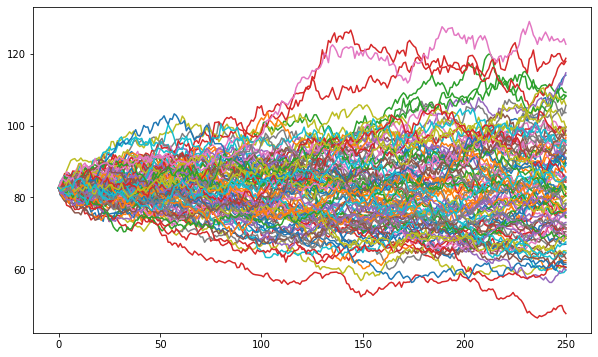

In [20]:
plt.figure(figsize=(10,6))
plt.plot(s)